|底质|样本数|
|:-:|:-:|
|潜铠虾区(1)|28|
|贻贝区(2)|257|
|贻贝潜铠虾共存区(3)|61|
|贝壳碎屑区(4)|370|
|碳酸盐区(5)|176|
|还原性沉淀区(w)|4|
|泥质底区(7)|811|

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import keras
from keras import models
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
model = load_model('model2_v2.h5')
model.summary() 

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 97, 97, 32)        0         


In [4]:
img_path = 'Images_selected//cold seep_EO_070.tif'
img = image.load_img(img_path, target_size=(400, 400))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

img_tensor /= 255.
print(img_tensor.shape)

(1, 400, 400, 3)


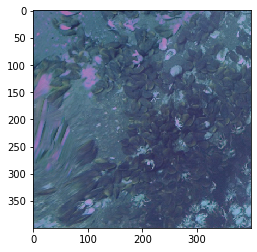

In [5]:
plt.imshow(img_tensor[0])
plt.show()

In [6]:
model.predict(img_tensor)

array([[0.00835716, 0.12791263, 0.01452588, 0.61593896, 0.18899053,
        0.04427487]], dtype=float32)

In [7]:
layer_outputs = [layer.output for layer in model.layers[:10]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

In [8]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 396, 396, 16)


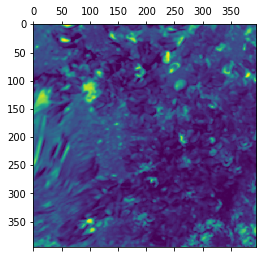

In [9]:
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

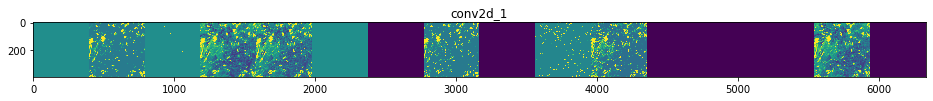

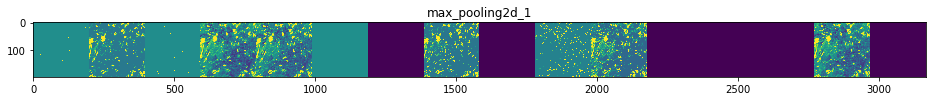

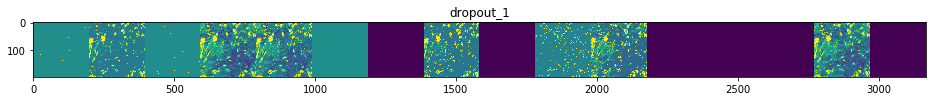

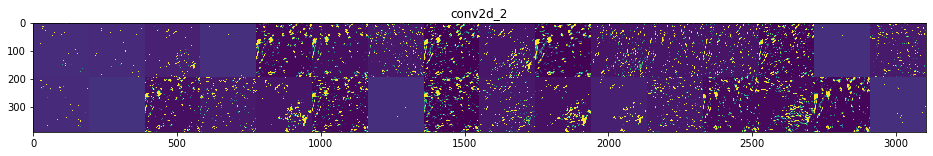

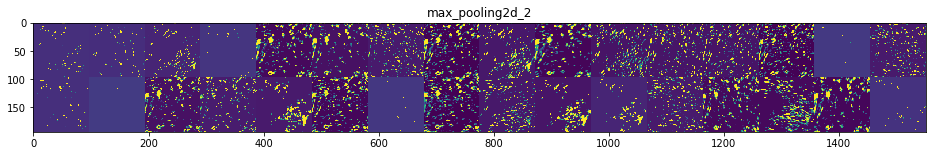

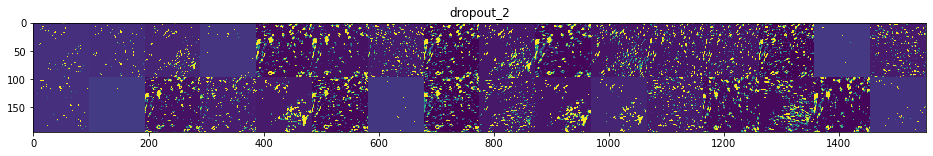

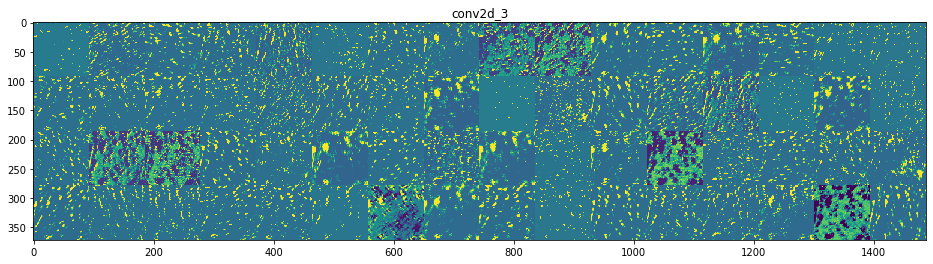

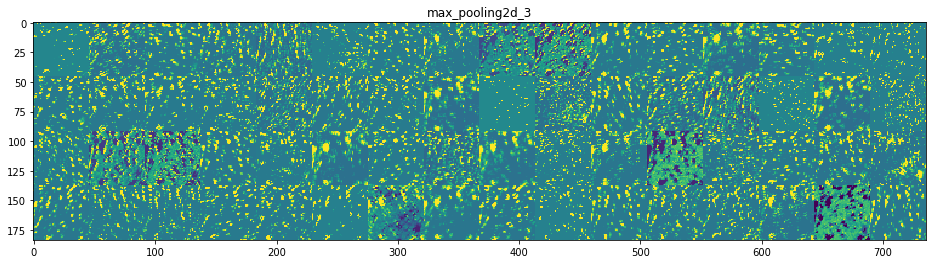

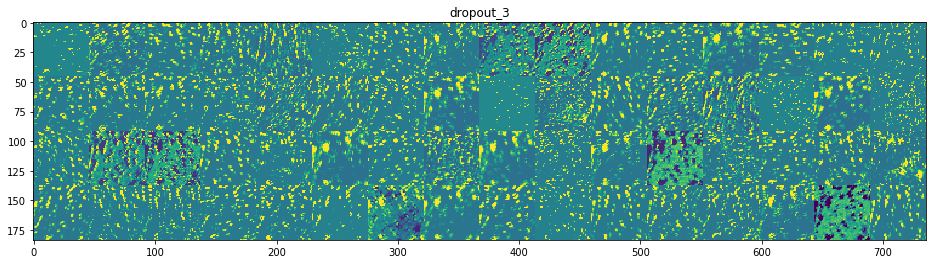

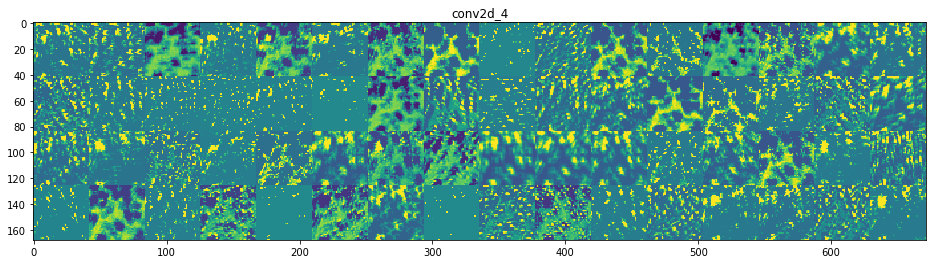

In [10]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:10]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()